# Лабораторная работа

## Импорт библиотек и данных

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import statsmodels.api as sm

In [2]:
df = pd.read_excel('Sample.xlsx')
DefaultFlag =  df['DefaultFlag']

In [3]:
df

,Регистрационный.номер,Код.налогоплательщика,DefaultFlag,Вид.деятельности.отрасль,"Период оборота собственного капитала, дни",Период оборота оборотных активов (в днях),Период оборота собственного капитала (в днях),Период оборота заемного капитала (в днях),Наличие непокрытого убытка,Цикл оборота движения денежных средств (операционный цикл),...,Рентабельность оборотных активов (ср),Коэффициент текущей ликвидности 3,Коэффициент быстрой ликвидности 3,Отношение наличных денег к общим активам,Достаточность инвестиционных ресурсов,Коэффициент маневренности собственных оборотных средств 3,Изменение прибыли до налогообложения,Изменение прибыли от продаж,Изменение операционной прибыли,Нераспределенная прибыль (непокрытый убыток)/Текущие обязательства
0,1100101000383,101009627,1,Выращивание зерновых культур,1,20,52,1,100,1,...,4,10,85,13,17,7,68,79,1,1
1,1120101000470,101011200,0,Выращивание прочих плодовых и ягодных культур,1,21,40,1,24,1,...,68,13,99,25,21,9,100,1,87,78
2,1060107005815,107011894,0,Торговля оптовая напитками,10,1,1,1,38,12,...,63,11,100,1,21,12,33,31,23,64
3,1020201250630,205005391,1,Выращивание сахарной свеклы,1,95,95,1,1,1,...,9,58,73,1,34,11,1,69,1,100
4,1020200882305,224007556,0,Производство верхней одежды из текстильных мат...,12,1,1,1,100,1,...,13,7,39,1,1,12,1,50,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119171,1167747000000,9721015507,0,Торговля оптовая химическими продуктами,98,76,47,68,100,97,...,27,1,89,49,100,38,46,69,35,2
119172,5167746000000,9721018850,0,Торговля легковыми автомобилями и грузовыми ав...,79,1,4,90,42,91,...,89,32,67,97,100,88,83,84,34,60
119173,5167746000000,9721028672,0,"Торговля оптовая зерном, необработанным табако...",100,71,48,97,47,98,...,44,1,12,1,100,12,85,86,26,55
119174,5167746000000,9729040819,0,"Торговля оптовая свежими овощами, фруктами и о...",92,47,18,35,51,45,...,17,67,11,1,100,12,100,100,1,51


In [4]:
DefNum = sum(DefaultFlag)
ObsNum = len(DefaultFlag)
DefShare = DefNum/ObsNum
# DefaultFlag.isnull().sum()

In [5]:
DefShare

0.05157078606430825

## №1

Посчитаем количество наблюдений и дефолтов по отраслям

In [6]:
df_industry = df[['Вид.деятельности.отрасль', 'DefaultFlag']]

In [7]:
df_industry_sum = df_industry.groupby(['Вид.деятельности.отрасль']).sum().reset_index()
df_industry_count = df_industry.groupby(['Вид.деятельности.отрасль']).count().reset_index()

Оставим только отрасли с 100+ наблюдениями

In [8]:
df_industry_count = df_industry_count[df_industry_count['DefaultFlag']>=100]

In [9]:
df_industry_count = df_industry_count.merge(df_industry_sum, how='left', on='Вид.деятельности.отрасль')

In [10]:
industries = df_industry_count['Вид.деятельности.отрасль'].unique()

In [11]:
df_1 = df[df['Вид.деятельности.отрасль'].isin(industries)]

Рассчитаем долю дефолтов по отраслям

In [12]:
df_industry_count['DefaultRate'] = df_industry_count['DefaultFlag_y']/df_industry_count['DefaultFlag_x']

Выберем топ-10 отраслей и построим по ним график

In [13]:
df_top_10_ind = df_industry_count.sort_values(by='DefaultRate', ascending=False).head(10)

Сделаем горизонтальную столбчатую диаграмму, чтобы названия не мешали нам в дальнейшем.

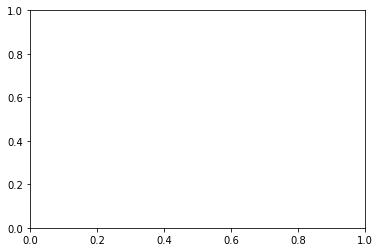

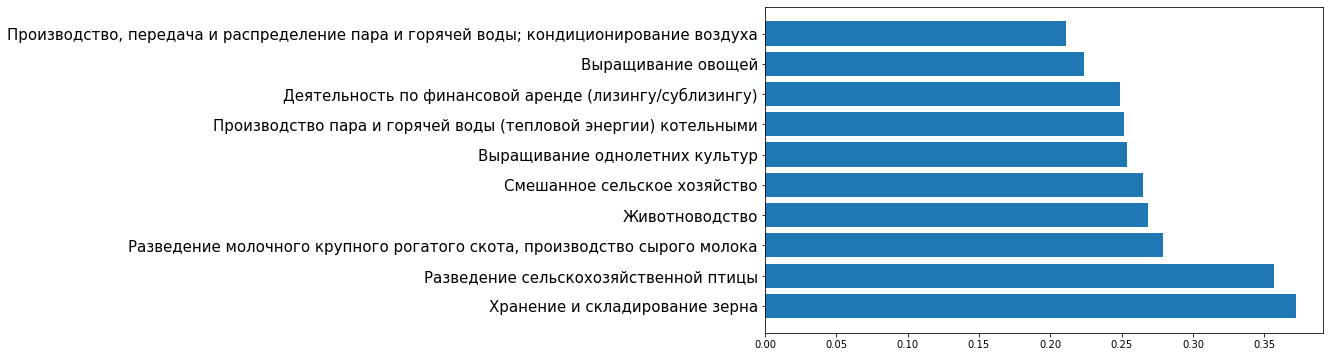

In [14]:
fig, ax = plt.subplots()
labels = df_top_10_ind['Вид.деятельности.отрасль']
value = df_top_10_ind['DefaultRate']
position = np.arange(10)

fig, ax = plt.subplots()

ax.barh(position, value)

#  Устанавливаем позиции тиков:
ax.set_yticks(position)

#  Устанавливаем подписи тиков
ax.set_yticklabels(labels,
                   fontsize = 15)

fig.set_figwidth(10)
fig.set_figheight(6)

# plt.bar(df_top_10_ind['Вид.деятельности.отрасль'],df_top_10_ind['DefaultRate'])
# plt.figure(figsize=(10, 10))
# plt.show()

## №2

Отберем из датасета У - флаг дефолта и Х - все объясняющие переменные

In [15]:
Y = df_1['DefaultFlag']
X = df_1.iloc[0:, 4:]

Разделим выборку на трейн и тест, причем разделим рандомно для чистоты анализа данных. Но для удобства зафиксируем random seed чтобы при перезапуске сохранялось то же разбиение и код был воспроизводимым. 

In [16]:
import tensorflow as tf
tf.compat.v1.set_random_seed(
    123
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

Сравним долю дефолтов для репрезентантивности данных

In [17]:
DefShare_train = sum(y_train)/len(y_train)
DefShare_test = sum(y_test)/len(y_test)

In [18]:
print("Train default share:", DefShare_train, "; Test default share:", DefShare_test, " - They seem to be equal")

Train default share: 0.04697898423817863 ; Test default share: 0.046582899172540604  - They seem to be equal


## №3

Проведем анализ качества данных

Посмотрим на долю самого частого значения в каждом столбце

In [19]:
new_columns = []
for i in X_train.columns:
  max_frequency_by_column = max(X_train[i].value_counts())/len(X_train[i])
  s = ""
  if max_frequency_by_column>0.2:
    s = "!!!!"
  else:
    new_columns.append(i)
  print(f"{i}: {round(100*max_frequency_by_column, 2)}%    {s}")

Период оборота собственного капитала, дни: 9.06%    
Период оборота оборотных активов (в днях): 17.05%    
Период оборота собственного капитала (в днях): 16.15%    
Период оборота заемного капитала (в днях): 10.47%    
Наличие непокрытого убытка: 45.06%    !!!!
Цикл оборота движения денежных средств (операционный цикл): 10.49%    
Цикл оборота движения денежных средств (операционный цикл) (ср): 11.49%    
Долговая нагрузка 3: 12.8%    
Коэффициент краткосрочной кредитной нагрузки на выручку (ср): 58.87%    !!!!
Рентабельность (убыточность) продаж : 6.49%    
Коэффициент обеспеченности активов СОС: 7.8%    
Рентабельность оборотных активов: 7.4%    
Доналоговая рентабельность активов: 6.32%    
Покрытие процентов прибылью до вычета процентов, налогов и амортизации: 76.05%    !!!!
Оборачиваемость оборотных активов : 10.91%    
Оборачиваемость внеоборотных активов: 59.52%    !!!!
Оборачиваемость запасов: 31.57%    !!!!
Оборачиваемость запасов (ср): 27.25%    !!!!
Оборачиваемость кредиторс

In [20]:
X_train = pd.DataFrame(X_train, columns=new_columns)

## №4

Применим функцию из семинара для подсчета коэффициента Джини и наличия кросса по факторам

In [21]:
def AR_calc_CAP(factor, default, plot_flag):
    
    df2 = pd.DataFrame(list(zip(factor, default)), columns= ['factor', 'default'])
    df2 = df2.groupby(by = 'factor')['default'].sum().reset_index()
    df2.sort_values(by = 'factor', inplace = True)
    
    y_values = np.append([0], np.cumsum(df2['default']))/sum(default)
    x_values = np.arange(0, len(df2) + 1)/len(df2)
    
    a = auc([0, 1], [0, 1])
    aP = auc([0, sum(default)/(len(default)), 1], [0, 1, 1]) - a
    AR_CAP = (auc(x_values, y_values) - a)/aP

    
    import math as m
    phi = m.pi/4
    # x1 = fpr*m.cos(phi) + tpr*m.sin(phi)
    y1 = -x_values*m.sin(phi) + y_values*m.cos(phi)
    q01 = round(0.05*len(y1))


    CrossNum = sum((np.diff(np.sign(y1[q01:(len(df2)-q01)]))) != 0)
    
    if (plot_flag == True):
        plt.figure(figsize = (20, 12))
        plt.plot([0, 1], [0, 1], c = 'r', linestyle = '--', label = 'Random Model')
        plt.plot([0, sum(default)/len(default), 1], 
                 [0, 1, 1], 
                 c = 'grey', 
                 linewidth = 1, 
                 label = 'Perfect Model')
        plt.plot(x_values, 
                 y_values, 
                 c = 'b', 
                 label = FactorName, 
                 linewidth = 1)

        # Plot information
        plt.xlabel('Share of observations', fontsize = 12)
        plt.ylabel('Share of defaults', fontsize = 12)
        plt.title('CAP-curve: AR = %1.3f' % AR_CAP, fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 6)
    return([AR_CAP, CrossNum])

In [22]:
factors = pd.DataFrame()
for i in range(len(new_columns)):
    Factor_i = X_train.iloc[0:,i]
    FactorName = X_train.columns[i]
    [Gini, Cross] = AR_calc_CAP(Factor_i, y_train, False)
    res = pd.DataFrame([{'FactorName': FactorName, 'Gini':Gini, 'Cross':Cross}])
    factors = factors.append(res, ignore_index = True)


In [23]:
factors['Must_be_reversed'] = "N"
factors.loc[factors['Gini']<0, 'Must_be_reversed'] = "Y"
factors.sort_values(by='Gini', ascending=False)

,FactorName,Gini,Cross,Must_be_reversed
3,Период оборота заемного капитала (в днях),0.763456,0,N
26,Отношение наличных денег к общим активам,0.719382,0,N
5,Цикл оборота движения денежных средств (операц...,0.622107,0,N
23,Рентабельность оборотных активов (ср),0.516441,0,N
9,Рентабельность оборотных активов,0.516441,0,N
4,Цикл оборота движения денежных средств (операц...,0.514981,1,N
22,Рентабельность инвестированного капитала (ROIC...,0.510536,0,N
10,Доналоговая рентабельность активов,0.508815,0,N
21,Рентабельность инвестированного капитала (ROIC...,0.491891,0,N
14,Рентабельность активов 3 (ROA),0.479405,0,N


## №5

Перевернем шкалы для факторов с отрицательным Джини

In [24]:
for i in factors[factors['Must_be_reversed']=="Y"]['FactorName'].unique():
  X_train[i] = 101-X_train[i]

И также перевернем шкалы для теста

In [25]:
for i in factors[factors['Must_be_reversed']=="Y"]['FactorName'].unique():
  X_test[i] = 101-X_test[i]

И посчитаем Джини заново с уже только положительными значениями

In [26]:
factors = pd.DataFrame()
for i in range(len(new_columns)):
    Factor_i = X_train.iloc[0:,i]
    FactorName = X_train.columns[i]
    [Gini, Cross] = AR_calc_CAP(Factor_i, y_train, False)
    res = pd.DataFrame([{'FactorName': FactorName, 'Gini':Gini, 'Cross':Cross}])
    factors = factors.append(res, ignore_index = True)

In [27]:
factors.sort_values(by='Gini', ascending=False)

,FactorName,Gini,Cross
3,Период оборота заемного капитала (в днях),0.763456,0
26,Отношение наличных денег к общим активам,0.719382,0
5,Цикл оборота движения денежных средств (операц...,0.622107,0
23,Рентабельность оборотных активов (ср),0.516441,0
9,Рентабельность оборотных активов,0.516441,0
4,Цикл оборота движения денежных средств (операц...,0.514981,1
22,Рентабельность инвестированного капитала (ROIC...,0.510536,0
10,Доналоговая рентабельность активов,0.508815,0
21,Рентабельность инвестированного капитала (ROIC...,0.491891,0
14,Рентабельность активов 3 (ROA),0.479405,0


## №6

Финализируем модель - отберем коэффициенты по Gini > 0.15, уберем факторы с пересечениями

In [28]:
final_factors = factors[(factors['Gini']>0.15) & (factors['Cross']==0)]

In [29]:
X_train_final = pd.DataFrame(X_train, columns=final_factors['FactorName'].unique())

А также уберем факторы с сильной корреляцией

In [30]:
ShortList = pd.DataFrame(X_train.iloc[:,0])

for i in range(1,X_train.shape[1]-1):
    CandidateName = X_train.columns[i]
    Candidate = X_train.iloc[:,i]    
    
    ShortList_0 = ShortList.join(Candidate)        
    C = ShortList_0.corr()
    ind = (abs(C)>0.7).sum().sum()    
    if (ind == len(C)):
        ShortList = ShortList.join(Candidate)
            
ShortList = ShortList.iloc[:,1:]

In [31]:
ShortList

,Период оборота оборотных активов (в днях),Период оборота заемного капитала (в днях),Цикл оборота движения денежных средств (операционный цикл),Долговая нагрузка 3,Рентабельность (убыточность) продаж,Коэффициент обеспеченности активов СОС,Рентабельность оборотных активов,Оборачиваемость кредиторской задолженности (ср),Рентабельность капитала по операционной прибыли (ROE) (ср),Рентабельность инвестированного капитала (ROIC) 6 (ср),Отношение наличных денег к общим активам,Коэффициент маневренности собственных оборотных средств 3,Изменение прибыли до налогообложения
82291,77,95,93,69,41,79,94,100,87,93,74,54,44
58083,23,15,22,1,40,43,33,33,91,41,63,100,88
116255,87,83,100,25,19,32,30,94,18,27,1,100,10
38918,13,93,71,90,48,80,70,100,38,55,87,64,48
111163,1,28,51,1,15,14,22,39,91,98,13,40,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8458,100,86,90,91,85,9,1,63,12,16,36,65,7
69295,44,65,65,51,27,56,44,77,28,41,61,49,24
94861,41,38,6,67,100,72,85,32,61,77,51,63,53
1233,59,1,1,13,67,50,23,9,19,21,1,12,22


In [32]:
len(ShortList.columns)

13

Получилось 13 факторов

In [33]:
X_train_final = ShortList

In [36]:
X_train_final = sm.add_constant(X_train_final)
FinalModel = sm.Logit(y_train, X_train_final)   
FinalResult = FinalModel.fit()



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.131077
         Iterations 9


In [40]:
FinalResult.summary()
R2_0 = FinalResult.prsquared
X_test_final = pd.DataFrame(X_test, columns=ShortList.columns)
X_test_final = sm.add_constant(X_test_final)
Y_pred = FinalResult.predict(X_test_final)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [41]:
FinalResult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            DefaultFlag   No. Observations:                68520
Model:                          Logit   Df Residuals:                    68506
Method:                           MLE   Df Model:                           13
Date:                Wed, 01 Feb 2023   Pseudo R-squ.:                  0.3084
Time:                        18:49:44   Log-Likelihood:                -8981.4
converged:                       True   LL-Null:                       -12986.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                          1.3506      0.066     20.459      0.000       1.221       1.480
Период оборота оборотных активов (в днях)                     -0.0220      0.001    -30.672      0.000      -0.023      -0.021
Период оборота заемного капитала (в днях)                     -0.0353      0.001    -26.415      0.000      -0.038      -0.033
Цикл оборота движения денежных средств (операционный цикл)     0.0012      0.001      1.462      0.144      -0.000       0.003
Долговая нагрузка 3                                            0.0047      0.001      5.417      0.000       0.003       0.006
Рентабельность (убыточность) продаж                           -0.0038      0.001     -4.724      0.000      -0.005      -0.002
Коэффициент обеспеченности активов СОС                        -0.0040      0.001     -4.503      0.000      -0.006      -0.002
Рентабельность оборотных активов                              -0.0055      0.001     -4.184      0.000      -0.008      -0.003
Оборачиваемость кредиторской задолженности (ср)               -0.0002      0.001     -0.253      0.801      -0.002       0.002
Рентабельность капитала по операционной прибыли (ROE) (ср)    -0.0055      0.001     -5.242      0.000      -0.008      -0.003
Рентабельность инвестированного капитала (ROIC) 6 (ср)        -0.0112      0.001    -10.138      0.000      -0.013      -0.009
Отношение наличных денег к общим активам                      -0.0296      0.001    -27.923      0.000      -0.032      -0.027
Коэффициент маневренности собственных оборотных средств 3     -0.0080      0.001    -11.095      0.000      -0.009      -0.007
Изменение прибыли до налогообложения                          -0.0021      0.001     -2.716      0.007      -0.004      -0.001
==============================================================================================================================
"""

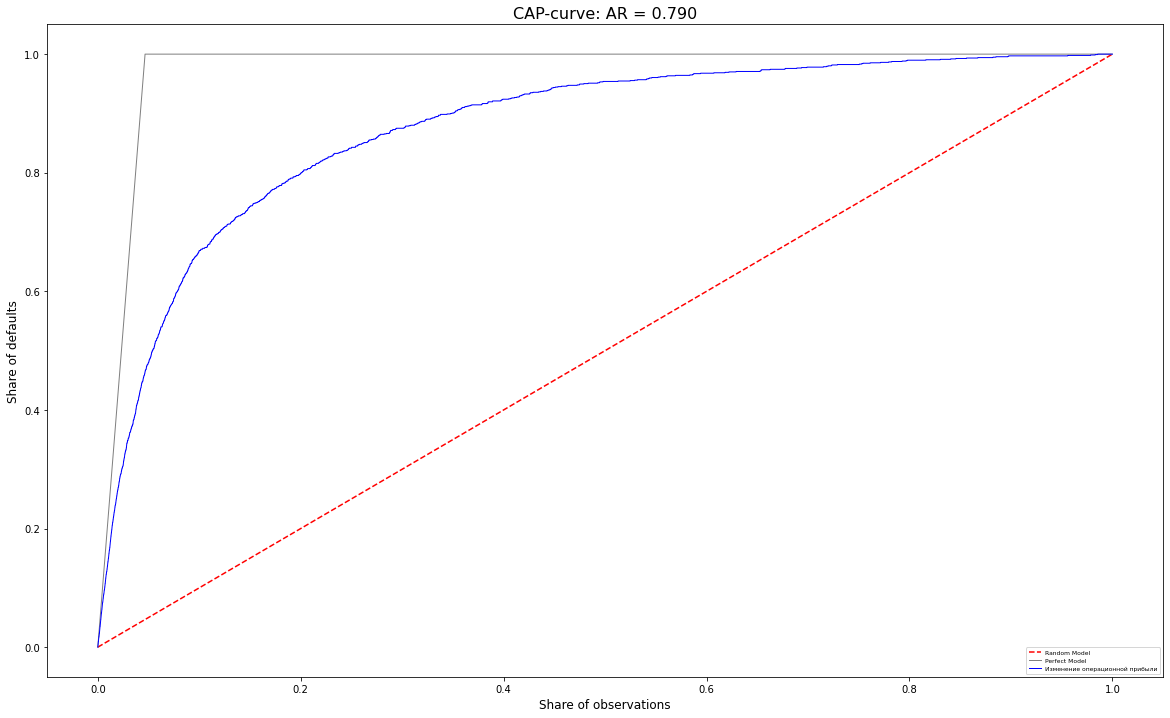

In [48]:
[Gini, Cross] = AR_calc_CAP(1-Y_pred, y_test, True)

In [49]:
print(f"Final Gini on Test is: {Gini}")

Final Gini on Test is: 0.7895609378153314


Итоговый коэффициент Джини получился 0.79, что в целом неплохо, это также видно на графике - наша модель качественная.